In [55]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib qt
np.random.seed(seed = 25)

In [56]:
# create 2 gaussians

normal1_mean = [-2, -2]
normal1_cov = [[1, 0], [0, 1]]
num_normal1_samples = 10
normal1 = np.random.multivariate_normal(mean=normal1_mean, cov=normal1_cov, size=num_normal1_samples)

normal2_mean = [2,2]
normal2_cov = [[1, 0], [0, 1]]
num_normal2_samples = 10
normal2 = np.random.multivariate_normal(mean=normal2_mean, cov=normal2_cov, size=num_normal2_samples)


In [57]:
# create a fully labeled dataset (for Part I)
X = np.concatenate((normal1,normal2),axis = 0)
print(X.shape)
print(X)
y = np.array(num_normal1_samples*[1])
y = np.concatenate((y,np.array(num_normal2_samples*[2])))
print(y.shape)
print(y)

(20, 2)
[[-1.77172691 -0.9731097 ]
 [-2.83958485 -2.59118152]
 [-2.9568883  -2.22232569]
 [-2.61991511 -0.16209542]
 [-4.05323076 -1.13141695]
 [-2.92073444 -2.23231186]
 [ 0.1529569  -3.33466147]
 [-1.92362035 -3.24608928]
 [-0.79772769 -3.04994158]
 [-0.94338989 -2.41967767]
 [ 4.29484234 -0.59448738]
 [ 4.8227564   2.68088892]
 [ 0.42230655  0.02374641]
 [ 2.53333982  1.70913029]
 [ 1.48648033  3.98262608]
 [ 2.22600105  0.16009504]
 [ 3.60767083  2.38829194]
 [ 2.39973206  2.4054766 ]
 [ 2.21700177  1.3665609 ]
 [ 2.24662153  0.06045448]]
(20,)
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [58]:
num_labeled_pts_per_cluster = 1
# create labeled y array
y_L = np.array(num_labeled_pts_per_cluster*[1])
y_L = np.concatenate((y_L,np.array(num_labeled_pts_per_cluster*[2])),axis = 0)
print(y_L)

# create labeled X array
# select points from each gaussian to be labeled points
rng = np.random.default_rng()
rand_inds_1 = rng.choice(num_normal1_samples, num_labeled_pts_per_cluster, replace=False)
X_L = normal1[rand_inds_1,:]
rand_inds_2 = rng.choice(num_normal2_samples, num_labeled_pts_per_cluster, replace=False)
X_L = np.concatenate((X_L,normal2[rand_inds_2,:]))
print(X_L)

# create unlabeled array
X_U = normal1.copy()
X_U = np.delete(X_U,rand_inds_1,axis = 0)
X_temp = normal2.copy()
X_temp = np.delete(X_temp,rand_inds_2,axis = 0)
X_U = np.concatenate((X_U,X_temp),axis = 0)
print(X_U.shape)

[1 2]
[[-4.05323076 -1.13141695]
 [ 2.53333982  1.70913029]]
(18, 2)


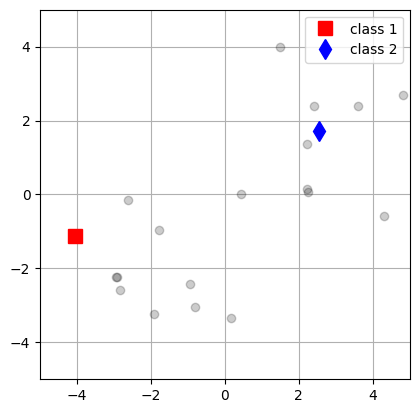

In [59]:
fig, axs = plt.subplots(1,1)

# plt.figure()
plt.plot(X_U[:,0],X_U[:,1],'ko',alpha = 0.2)

c_inds = np.where(y_L == 1)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_L == 2)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)

axs.set(xlim=(-5, 5), ylim=(-5, 5))
axs.set_aspect('equal', 'box')

plt.grid()
plt.legend()

C:\Users\krisr\AppData\Local\Temp\ipykernel_13980\3814241143.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "rs" (-> marker='s'). The keyword argument will take precedence.
  ax.plot(X[:9,0], X[:9,1], 'rs',marker='o')
C:\Users\krisr\AppData\Local\Temp\ipykernel_13980\3814241143.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bs" (-> marker='s'). The keyword argument will take precedence.
  ax.plot(X[10:17,0], X[10:17,1], 'bs',marker='o')


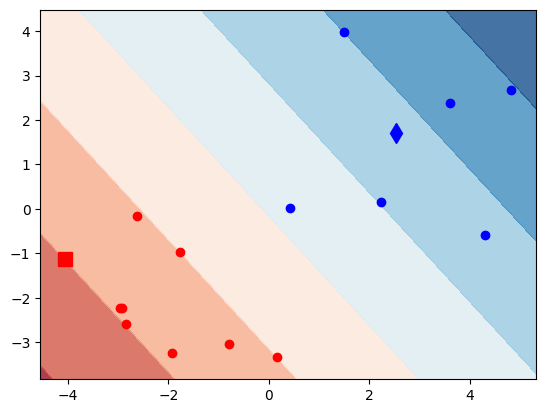

In [60]:
# Part I - Find classifier using fully labeled data (i.e. X,y)
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

classifier_A = SVC(kernel="linear", C=0.2, random_state=42, probability=True)   

classifier_A.fit(X,y)
ax = plt.subplot()
cm = plt.cm.RdBu
ax.plot(X[:9,0], X[:9,1], 'rs',marker='o')
ax.plot(X[10:17,0], X[10:17,1], 'bs',marker='o')
DecisionBoundaryDisplay.from_estimator(
            classifier_A, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

c_inds = np.where(y_L == 1)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_L == 2)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)

plt.show()

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


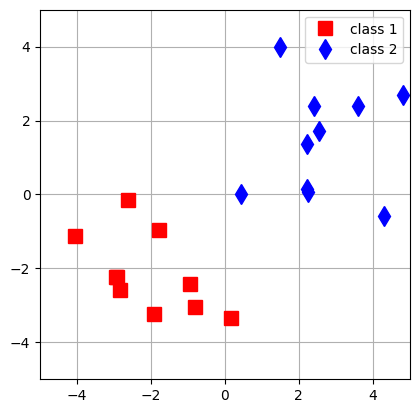

[[0.81579175 0.18420825]
 [0.94868186 0.05131814]
 [0.94271176 0.05728824]
 [0.83248858 0.16751142]
 [0.94941577 0.05058423]
 [0.94174321 0.05825679]
 [0.81579175 0.18420825]
 [0.93833246 0.06166754]
 [0.87331689 0.12668311]
 [0.84605636 0.15394364]
 [0.08022372 0.91977628]
 [0.01205025 0.98794975]
 [0.4096021  0.5903979 ]
 [0.07511305 0.92488695]
 [0.04713518 0.95286482]
 [0.17613027 0.82386973]
 [0.02897467 0.97102533]
 [0.05854681 0.94145319]
 [0.10489919 0.89510081]
 [0.18162014 0.81837986]]


In [61]:
#plot X based on classifier_A prediction
y_pred_A = classifier_A.predict(X)
print(y_pred_A)
print(y)
print(classifier_A.predict_proba(X))
fig, axs = plt.subplots(1,1)
c_inds = np.where(y_pred_A == 1)[0]
plt.plot(X[c_inds,0],X[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_pred_A == 2)[0]
plt.plot(X[c_inds,0],X[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)
plt.grid()
plt.legend()
axs.set(xlim=(-5, 5), ylim=(-5, 5))
axs.set_aspect('equal', 'box')
plt.show()




(2, 2)
(2,)


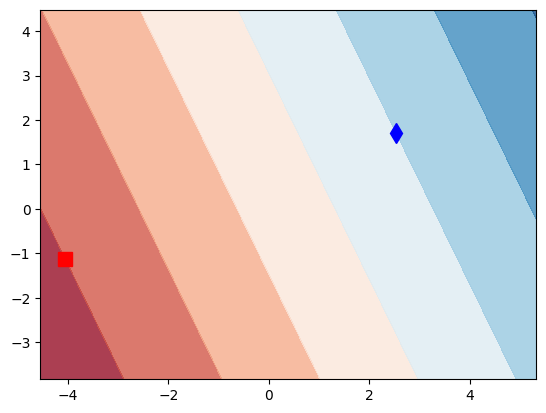

In [66]:
# Part II - Find classifier using subset of labeled data (i.e. just X_L,y_L)

print(X_L.shape )
print(y_L.shape)

classifier_L = SVC(kernel="linear", C=0.2, random_state=42, probability=True)   
classifier_L.fit(X_L,y_L)

ax = plt.subplot()
cm = plt.cm.RdBu
c_inds = np.where(y_L == 1)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_L == 2)[0]
plt.plot(X_L[c_inds,0],X_L[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)
DecisionBoundaryDisplay.from_estimator(
            classifier_L, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )


plt.show()

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


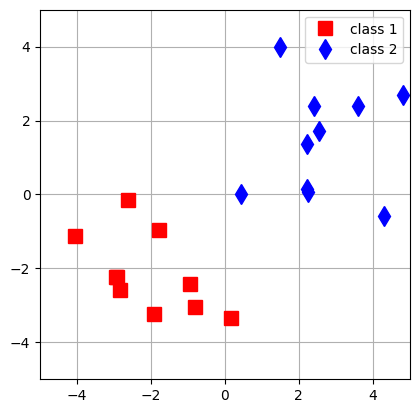

[[0.4312056  0.5687944 ]
 [0.3530268  0.6469732 ]
 [0.35490039 0.64509961]
 [0.40926058 0.59073942]
 [0.33333332 0.66666668]
 [0.3563277  0.6436723 ]
 [0.47119724 0.52880276]
 [0.38127178 0.61872822]
 [0.43465527 0.56534473]
 [0.44021226 0.55978774]
 [0.69623813 0.30376187]
 [0.76383369 0.23616631]
 [0.54720321 0.45279679]
 [0.66350711 0.33649289]
 [0.66102827 0.33897173]
 [0.62581433 0.37418567]
 [0.71824725 0.28175275]
 [0.66967667 0.33032333]
 [0.64591322 0.35408678]
 [0.62491895 0.37508105]]


In [63]:
#plot X based on classifier_L prediction
y_pred_L = classifier_L.predict(X)
print(y_pred_L)
print(y)
print(classifier_L.predict_proba(X))
fig, axs = plt.subplots(1,1)
c_inds = np.where(y_pred_L == 1)[0]
plt.plot(X[c_inds,0],X[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
c_inds = np.where(y_pred_L == 2)[0]
plt.plot(X[c_inds,0],X[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)
plt.grid()
plt.legend()
axs.set(xlim=(-5, 5), ylim=(-5, 5))
axs.set_aspect('equal', 'box')
plt.show()






[[0.4312056  0.5687944 ]
 [0.3530268  0.6469732 ]
 [0.35490039 0.64509961]
 [0.40926058 0.59073942]
 [0.3563277  0.6436723 ]
 [0.47119724 0.52880276]
 [0.38127178 0.61872822]
 [0.43465527 0.56534473]
 [0.44021226 0.55978774]
 [0.69623813 0.30376187]
 [0.76383369 0.23616631]
 [0.54720321 0.45279679]
 [0.66102827 0.33897173]
 [0.62581433 0.37418567]
 [0.71824725 0.28175275]
 [0.66967667 0.33032333]
 [0.64591322 0.35408678]
 [0.62491895 0.37508105]]
No more points to label


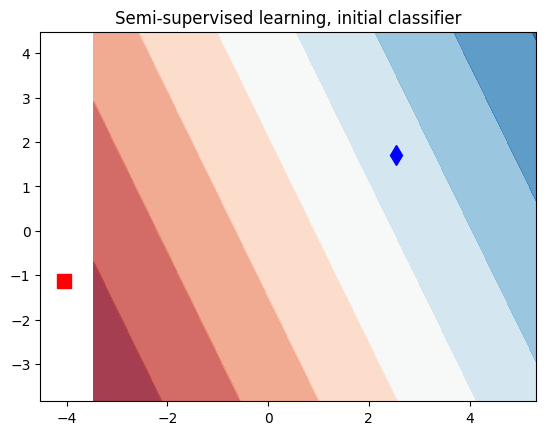

In [64]:
# Part III - Find classifier using semi-supervised wrapper method (i.e. X_L,y_L, and X_U)

probability_threshold = 0.8
y_psuedoL = []
X_psuedoL = []
U_pseudoL = np.copy(X_U)

def make_plot(XL, yL, Xu, classifier, ax, cm, title):
    c_inds = np.where(yL == 1)[0]
    ax.plot(XL[c_inds,0],XL[c_inds,1],'rs',label = f'class {str(1)}',markersize = 10)
    c_inds = np.where(yL == 2)[0]
    ax.plot(XL[c_inds,0],XL[c_inds,1],'bd',label = f'class {str(2)}',markersize = 10)
    DecisionBoundaryDisplay.from_estimator(
                classifier, Xu, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            )
    
    ax.set_title(title)


classifier_semi = SVC(kernel="linear", C=0.2, random_state=42, probability=True)
classifier_semi.fit(X_L,y_L)


fig, axs = plt.subplots(1,1)
ax = plt.subplot()
cm = plt.cm.RdBu
make_plot(X_L, y_L, X_U, classifier_semi, ax, cm, 'Semi-supervised learning, initial classifier')

#loop until no more points are added to the psuedo labeled set
j = 0
opportunity_to_label_more_points = True
while len(U_pseudoL) != len(X_psuedoL) and opportunity_to_label_more_points == True:
    
    prob = classifier_semi.predict_proba(U_pseudoL)
    print(prob)
    if np.amax(prob) > probability_threshold:
        for i in range(len(prob)):
            if prob[i][np.argmax(prob[i])] > probability_threshold:        
                y_psuedoL.append(np.argmax(prob[i])+1)
                X_psuedoL.append(U_pseudoL[i])            
    else:
        opportunity_to_label_more_points = False
        print('No more points to label')

    if len(y_psuedoL) > 0:
        X_psuedoL = np.concatenate((X_L, X_psuedoL))
        y_psuedoL = np.concatenate((y_L, y_psuedoL))
        classifier_semi.fit(X_psuedoL, y_psuedoL)   
 

        fig, axs = plt.subplots(1,1)
        ax = plt.subplot()
        cm = plt.cm.RdBu
        make_plot(X_psuedoL, y_psuedoL, X_U, classifier_semi, ax, cm, f'Semi-supervised learning, iteration {j}')
        plt.show()

    j += 1




In [65]:
# Show the classifier boundaries for all of these on a single plot